<h1>非線形回帰モデル</h1>

<h2>必要モジュールのインポート</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

<h2>データ作成</h2>

In [2]:
# データ作成用関数
n=100

def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

def linear_func(x):
    z = x
    return z 

No handles with labels found to put in legend.


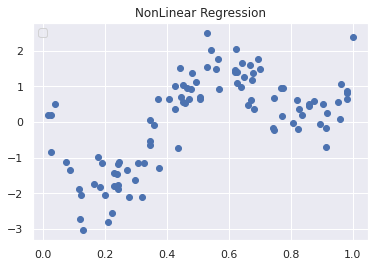

In [3]:
# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

# 　ノイズを加える
noise = 0.5 * np.random.randn(n) 
target = target  + noise

# ノイズ付きデータを描画
plt.scatter(data, target)
plt.title('NonLinear Regression')
plt.legend(loc=2)

<h2>線形回帰</h2>
線形回帰でモデル構築すると、うまく予測できていないことがわかる。

0.36261228359197795


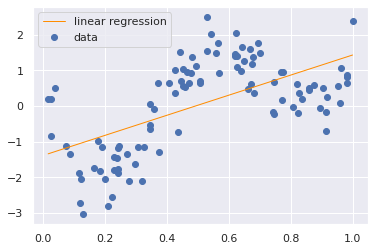

In [4]:
# モデルの作成と学習
clf = LinearRegression()
data = data.reshape(-1,1) # n行1列に変形する
target = target.reshape(-1,1)
clf.fit(data, target)

# 学習させたモデルで予測
p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

<h2>非線形回帰（RBFカーネル）</h2>
以下の実装で行っているKernelRidge回帰は、Ridge回帰とカーネルトリックを組み合わせたものです。

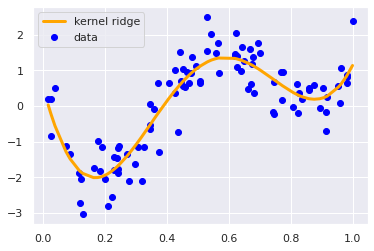

In [9]:
# モデルの作成と学習
clf = KernelRidge(alpha=0.0002, kernel='rbf')
clf.fit(data, target)

# 学習させたモデルで予測
p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')
plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()

0.7945679466602543


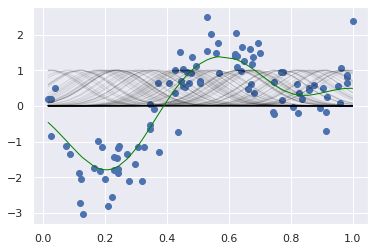

In [6]:
# モデルの作成と学習
kx = rbf_kernel(X=data, Y=data, gamma=50)
clf = Ridge(alpha=30)
clf.fit(kx, target)

# 学習させたモデルで予測
p_ridge = clf.predict(kx)

plt.scatter(data, target,label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.1)

plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')

print(clf.score(kx, target))

<h2>非線形回帰（多項式カーネル）</h2>

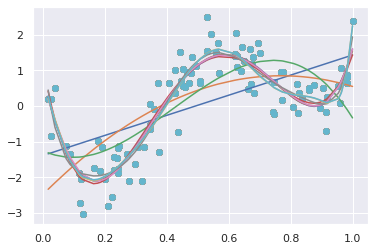

In [8]:
#PolynomialFeatures

deg = [1,2,3,4,5,6,7,8,9,10]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))